# STOCK PRICE PREDCTION USING LSTM

## Introduction:

In this project, we will use Long Short-Term Memory (LSTM), a type of recurrent neural network,
to predict the stock prices of Apple Inc. (AAPL). 
LSTM networks are well-suited for time-series forecasting tasks due to their ability to 
capture long-term dependencies in sequential data.
We will use historical stock price data of AAPL from Yahoo Finance, preprocess the data, 
build an LSTM model, train it, and then evaluate its performance on test data. 
Finally, we will use the trained model to predict the stock price for a specific date range.

#### In this notebook, we will go through the following steps:

1)Data Collection: Utilize the Yahoo Finance API to gather historical stock price data for Apple Inc. (AAPL) covering the period from January 1, 2012, to July 18, 2023. The dataset will consist of daily closing prices.

2)Data Preprocessing: Scale the closing prices to a range between 0 and 1 to ensure compatibility with the LSTM model. This preprocessing step enhances the model's convergence during training.

3)LSTM Model Building: Develop an LSTM-based deep learning model using Keras, a high-level neural networks API. The model will comprise two LSTM layers, which excel in capturing temporal dependencies, and will be followed by dense layers for processing the sequential information and making predictions.

4)Model Training: Split the dataset into training and testing sets to train the LSTM model. During training, the model learns from the historical stock price patterns in the training data and adapts its weights to minimize the mean squared error (MSE) loss.

5)Model Evaluation: Assess the model's performance on the testing data by calculating the root mean squared error (RMSE). RMSE measures the discrepancy between the predicted stock prices and the actual prices, providing insights into the model's accuracy.

6)Predicting Future Stock Prices: Deploy the trained LSTM model to forecast the stock prices for a specific date range. By inputting the last 60 days of historical closing prices, the model generates predictions for future stock prices.

#### Importing  libraries

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Setting up the date range

In [2]:
import yfinance as yf
start_date = '2012-01-01'
end_date = '2023-07-18'

#### Downloading historical stock data from Yahoo Finance

In [3]:
df = yf.download('AAPL', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


#### Exploring the data

In [4]:
print(df)
df.shape

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.482926   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.550010   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.689342   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.821994   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.801654   
...                ...         ...         ...         ...         ...   
2023-07-11  189.160004  189.300003  186.600006  188.080002  188.080002   
2023-07-12  189.679993  191.699997  188.470001  189.770004  189.770004   
2023-07-13  190.500000  191.190002  189.779999  190.539993  190.539993   
2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   
2023-07-17  191.899994  194.320007  191.809998  193.990005  193.990005   

               Volume  
Date         

(2902, 6)

#### Visulation closing price history

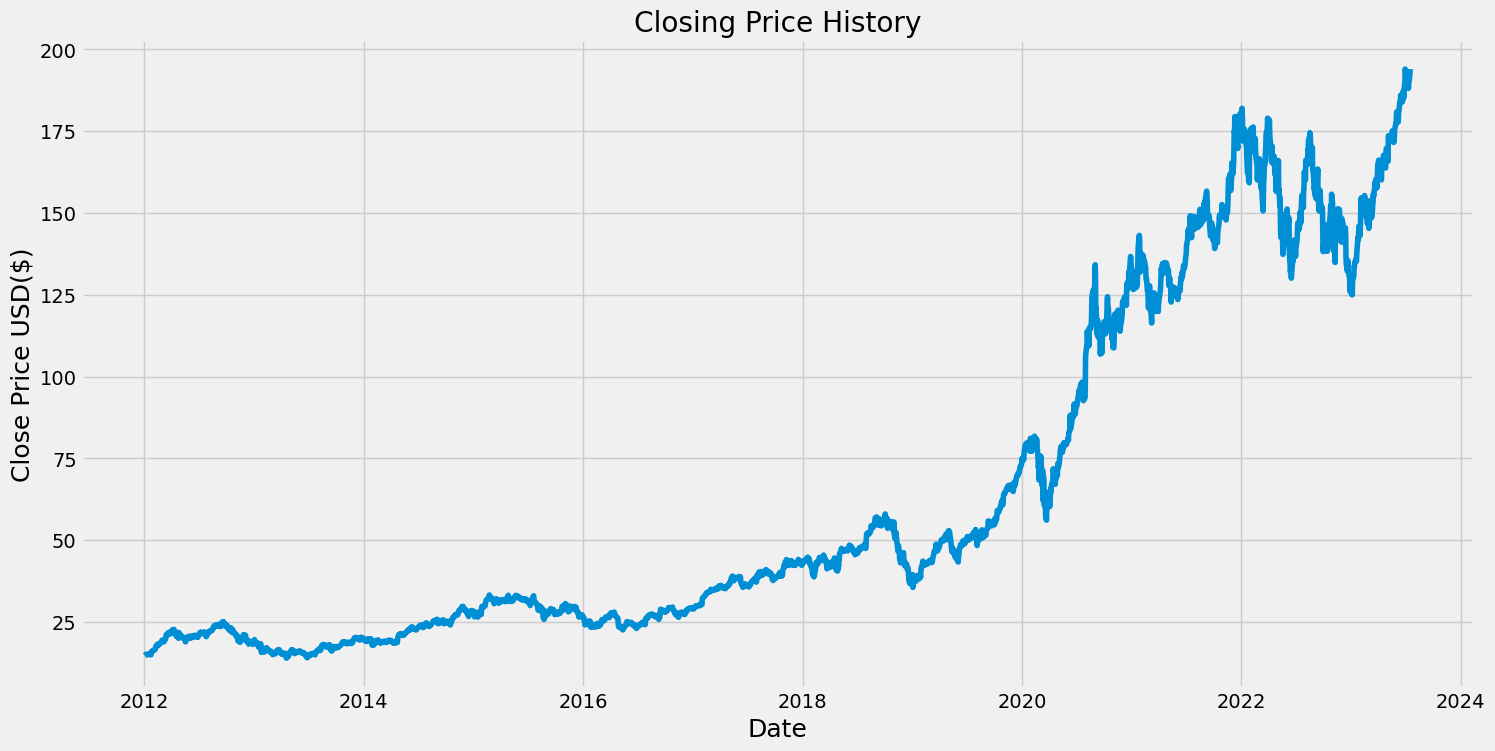

In [5]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

#### Data preprocessing

In [6]:
#Create a new dataframe with only the " Close Column"
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2322

In [7]:
#Scale the Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00410617],
       [0.00454456],
       [0.00545506],
       ...,
       [0.98083779],
       [0.98167098],
       [1.        ]])

#### Splitting the data into training sets (x_train, y_train)

In [8]:
#Create traing data set
#Crdeate scaled traing dataset
train_data=scaled_data[0:training_data_len,:]
#Split the Data into X_train and Y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if(i<=61):
        print(x_train)
        print(y_train)
        print()




[array([0.00410617, 0.00454456, 0.00545506, 0.00632192, 0.00618901,
       0.00648854, 0.00635167, 0.00612157, 0.00580815, 0.00677816,
       0.00765296, 0.00738318, 0.00590535, 0.00731573, 0.00592717,
       0.01113427, 0.01073159, 0.01125726, 0.0123939 , 0.01308222,
       0.0130247 , 0.01281245, 0.013717  , 0.01456798, 0.01553205,
       0.01708922, 0.02036027, 0.02040986, 0.02223086, 0.02359165,
       0.02125292, 0.0221535 , 0.02213565, 0.02466085, 0.0243018 ,
       0.02496632, 0.02616048, 0.02682502, 0.02873925, 0.03013375,
       0.03053643, 0.03067728, 0.02829293, 0.02771766, 0.02780296,
       0.0300445 , 0.0306753 , 0.03203014, 0.03522382, 0.03948472,
       0.03868729, 0.03868927, 0.0417699 , 0.04273396, 0.04204761,
       0.04142078, 0.04076815, 0.04293628, 0.04442404, 0.0450469 ])]
[0.04350758058300769]

[array([0.00410617, 0.00454456, 0.00545506, 0.00632192, 0.00618901,
       0.00648854, 0.00635167, 0.00612157, 0.00580815, 0.00677816,
       0.00765296, 0.00738318, 0.00

#### Convert X_train and Y_train in to numpy arrays

In [9]:
x_train,y_train=np.array(x_train),np.array(y_train)

#### Reshape the data

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],60,1))
x_train.shape

(2262, 60, 1)

#### Built the LSTM model

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [73]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=9)

Epoch 1/9
2262/2262 [==============================] - 82s 36ms/step - loss: 6.9736e-05
Epoch 2/9
2262/2262 [==============================] - 81s 36ms/step - loss: 7.6710e-05
Epoch 3/9
2262/2262 [==============================] - 84s 37ms/step - loss: 6.9103e-05
Epoch 4/9
2262/2262 [==============================] - 81s 36ms/step - loss: 7.4868e-05
Epoch 5/9
2262/2262 [==============================] - 81s 36ms/step - loss: 7.6607e-05
Epoch 6/9
2262/2262 [==============================] - 81s 36ms/step - loss: 6.3223e-05
Epoch 7/9
2262/2262 [==============================] - 81s 36ms/step - loss: 6.9557e-05
Epoch 8/9
2262/2262 [==============================] - 525s 232ms/step - loss: 7.5418e-05
Epoch 9/9
2262/2262 [==============================] - 78s 35ms/step - loss: 6.5469e-05


#### Preparing test data for prediction

In [74]:
#Create the testing data set
#Create a new array containing scaled value from index 2322 to 2902
test_data=scaled_data[training_data_len-60:,:1]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [75]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [76]:
#Reshape the data to numpy array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#### Making predictions

In [77]:
#Get the model predicted price value
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 32ms/step


#### Calculating RMSE for evaluation

In [78]:
#Get the RMSE error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.9781768272662985

#### Visualizing the predictions and actual prices

C:\Users\shrey\AppData\Local\Temp\ipykernel_12140\919521623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


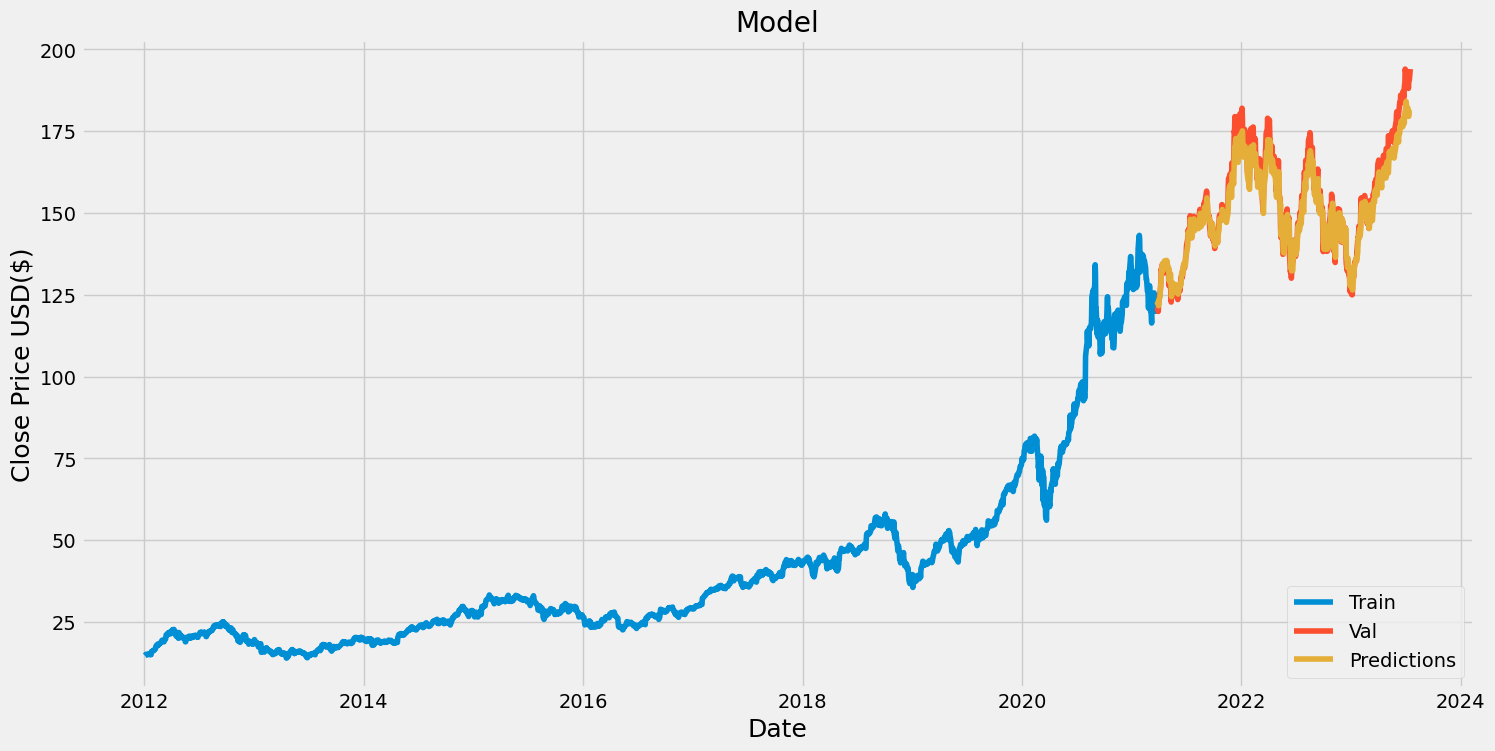

In [79]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [80]:
#Show the valid and Predicted price
valid

,Close,Predictions
Date,,
2021-03-26,121.209999,121.876434
2021-03-29,121.389999,122.545845
2021-03-30,119.900002,122.926292
2021-03-31,122.150002,121.669556
2021-04-01,123.000000,123.269722
...,...,...
2023-07-11,188.080002,179.798843
2023-07-12,189.770004,179.511337
2023-07-13,190.539993,181.011932


#### Predicting stock prices for a specific date range

In [81]:
import yfinance as yf

# Get the quote
apple_quote = yf.download('AAPL', start='2023-04-05', end='2023-04-10')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
x_test = []

# Append the past 60 days
x_test.append(last_60_days_scaled)

# Convert the x_test data set to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(x_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print("Predicted Stock Price:",pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 45ms/step
Predicted Stock Price: [[164.39015]]


#### Viewing actual stock prices for the same date range

In [82]:
import yfinance as yf

# Get the quote for a range of dates
apple_quote2 = yf.download('AAPL', start='2023-04-05', end='2023-04-10')

# Print the closing prices
print("Actual Stock Prices:",apple_quote2['Close'])


[*********************100%***********************]  1 of 1 completed
Actual Stock Prices: Date
2023-04-05    163.759995
2023-04-06    164.660004
Name: Close, dtype: float64
